In [2]:
import pandas as pd

df = pd.read_csv("../data/Sports_ECommerce_Products_Data.csv")
df.head()


,Product Name,Old Price,Special Price,Discount %,Product
0,SG Opti Pack Cricket Kit Bag Black and Lime,1549.0,1317.0,14.977405,SG Cricket Bat Toe Guard Pack
1,SG Jaffa Cricket Kit Bag,2899.0,2464.0,15.005174,SG Cricket Bat Toe Guard Pack
2,SG 22 Yard X2 Trolley Cricket Kit Bag,4899.0,3674.0,25.005103,SG Cricket Bat Toe Guard Pack
3,SM Fanatic Cricket Kit Bag,1475.0,1230.0,16.610169,SG Cricket Bat Toe Guard Pack
4,SM Collide Cricket Kit Bag,2195.0,1990.0,9.339408,SG Cricket Bat Toe Guard Pack


In [3]:
df.shape


(7878, 5)

In [4]:
df.describe()


,Old Price,Special Price,Discount %
count,7878.000000,7878.000000,7878.000000
mean,7546.145088,5646.147372,25.817463
std,11907.460389,9861.564611,16.967296
min,120.000000,110.000000,0.168481
25%,1590.000000,1149.000000,12.753188
50%,3600.000000,2625.000000,21.666667
75%,7068.000000,4990.000000,35.238095
max,179999.000000,125999.000000,75.025000


In [21]:
df[["Old Price", "Special Price", "Discount %"]].agg(
    ["mean", "median", "var", "std"]
)


,Old Price,Special Price,Discount %
mean,7.546145e+03,5.646147e+03,25.817463
median,3.600000e+03,2.625000e+03,21.666667
var,1.417876e+08,9.725046e+07,287.889140
std,1.190746e+04,9.861565e+03,16.967296


### Medidas estadísticas adicionales

Se calcularon medidas adicionales de tendencia central y dispersión, incluyendo media, mediana, varianza y desviación estándar, lo que permitió complementar el análisis descriptivo inicial y profundizar en la variabilidad de los precios y descuentos.


In [ ]:
import statsmodels.api as sm

X = df["Old Price"]
y = df["Special Price"]

X = sm.add_constant(X)


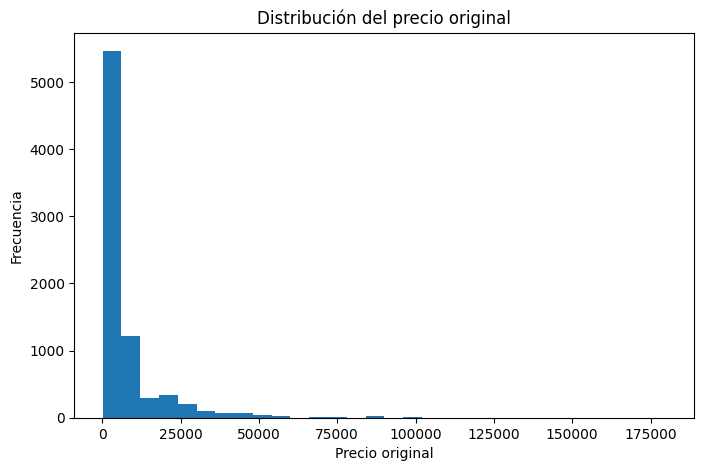

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["Old Price"], bins=30)
plt.title("Distribución del precio original")
plt.xlabel("Precio original")
plt.ylabel("Frecuencia")
plt.show()


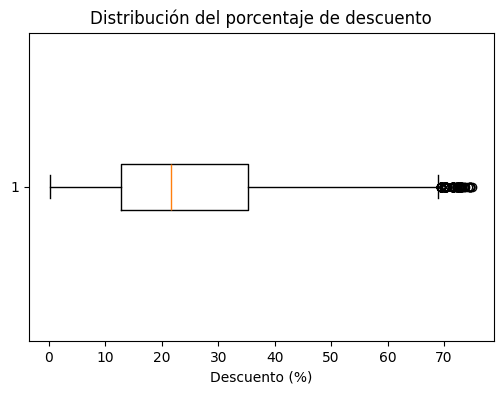

In [7]:
plt.figure(figsize=(6,4))
plt.boxplot(df["Discount %"], vert=False)
plt.title("Distribución del porcentaje de descuento")
plt.xlabel("Descuento (%)")
plt.show()


## Análisis estadístico descriptivo

A partir del análisis estadístico del dataset, se observa una dispersión relevante en los precios originales y en los precios con descuento, lo que indica la existencia de productos con distintos rangos de valor. El porcentaje de descuento presenta variabilidad, con presencia de valores atípicos que podrían corresponder a promociones especiales o estrategias comerciales diferenciadas.


# Análisis de correlación


In [8]:
df_numeric = df[["Old Price", "Special Price", "Discount %"]]
df_numeric.head()


,Old Price,Special Price,Discount %
0,1549.0,1317.0,14.977405
1,2899.0,2464.0,15.005174
2,4899.0,3674.0,25.005103
3,1475.0,1230.0,16.610169
4,2195.0,1990.0,9.339408


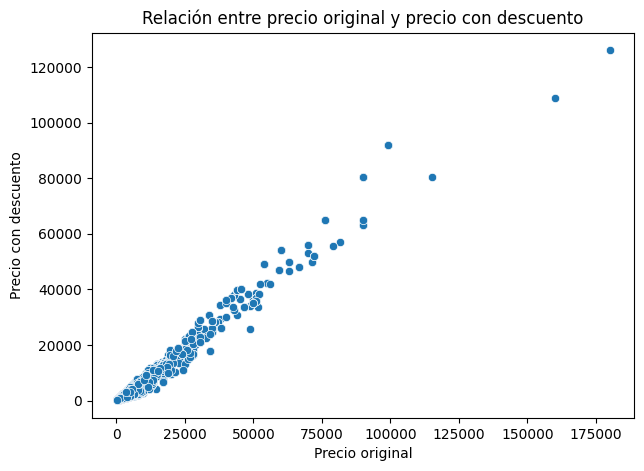

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Old Price",
    y="Special Price",
    data=df
)
plt.title("Relación entre precio original y precio con descuento")
plt.xlabel("Precio original")
plt.ylabel("Precio con descuento")
plt.show()


## Análisis visual de la relación entre precios

El gráfico de dispersión evidencia una relación positiva entre el precio original y el precio con descuento. A medida que aumenta el precio original de los productos, también se incrementa su precio final, lo que indica una estructura de precios coherente dentro del comercio electrónico analizado.


In [10]:
df_numeric.corr()


,Old Price,Special Price,Discount %
Old Price,1.000000,0.986174,-0.023873
Special Price,0.986174,1.000000,-0.119658
Discount %,-0.023873,-0.119658,1.000000


## Interpretación de los coeficientes de correlación

Los coeficientes de correlación permiten cuantificar la relación entre las variables numéricas del dataset. Se observa una correlación positiva fuerte entre el precio original y el precio con descuento, confirmando la tendencia observada en el análisis visual. El porcentaje de descuento presenta una relación distinta con el precio original, lo que sugiere la aplicación de estrategias comerciales diferenciadas.


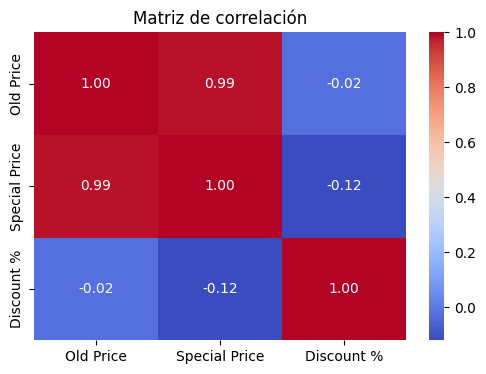

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df_numeric.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Matriz de correlación")
plt.show()


## Conclusiones del análisis de correlación

El análisis de correlación permitió identificar relaciones relevantes entre las variables del dataset. La fuerte correlación entre el precio original y el precio con descuento evidencia una estructura de precios consistente. Por otra parte, la variabilidad observada en el porcentaje de descuento sugiere el uso de estrategias comerciales diferenciadas según el tipo o valor del producto.


### Consideración sobre correlaciones espurias

Si bien se identificaron correlaciones entre las variables numéricas, es importante destacar que la correlación no implica causalidad. En este análisis, la relación entre precio original y precio con descuento es esperable desde un punto de vista comercial. No se detectaron correlaciones espurias evidentes, ya que las relaciones observadas tienen una justificación lógica en el contexto del comercio electrónico.


# Regresión lineal


In [14]:
import statsmodels.api as sm

X = df["Old Price"]
y = df["Special Price"]

X = sm.add_constant(X)


In [15]:
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Special Price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 2.789e+05
Date:                Sat, 07 Feb 2026   Prob (F-statistic):               0.00
Time:                        14:16:24   Log-Likelihood:                -69466.
No. Observations:                7878   AIC:                         1.389e+05
Df Residuals:                    7876   BIC:                         1.390e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -517.0398     21.799    -23.718      0.000    -559.772    -474.307
Old Price      0.8167      0.002    528.139      0.000       0.814       0.820
==============================================================================
Omnibus:                     2796.694   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96758.434
Skew:                          -1.043   Prob(JB):                         0.00
Kurtosis:                      20.042   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

mse, mae


(2670250.7517254176, 961.0303170800195)

### Evaluación del modelo de regresión

Las métricas de error permiten evaluar el desempeño del modelo de regresión. El error cuadrático medio (MSE) y el error absoluto medio (MAE) entregan una medida cuantitativa de la diferencia entre los valores reales y los valores predichos, confirmando que el modelo presenta un ajuste adecuado para el análisis exploratorio realizado.


## Interpretación del modelo de regresión

El modelo de regresión lineal permite analizar la relación entre el precio original y el precio con descuento de los productos. Los resultados indican que el precio original es un predictor significativo del precio final, lo que confirma que existe una relación directa entre ambas variables. El valor del coeficiente de determinación (R²) muestra qué proporción de la variabilidad del precio con descuento es explicada por el precio original.


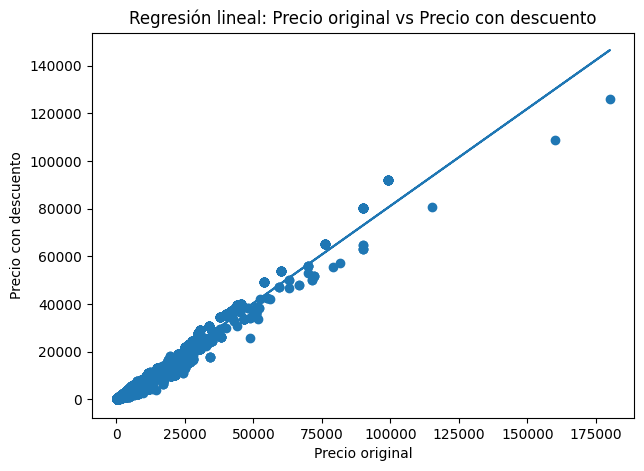

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df["Old Price"], df["Special Price"])
plt.plot(df["Old Price"], model.predict(X))
plt.xlabel("Precio original")
plt.ylabel("Precio con descuento")
plt.title("Regresión lineal: Precio original vs Precio con descuento")
plt.show()


## Conclusiones del análisis de regresión

El análisis de regresión confirma la existencia de una relación lineal entre el precio original y el precio con descuento. Este resultado es consistente con los análisis exploratorios y de correlación previos, y permite afirmar que el precio original es un factor clave en la determinación del precio final de los productos en el comercio electrónico analizado.


# Análisis visual avanzado


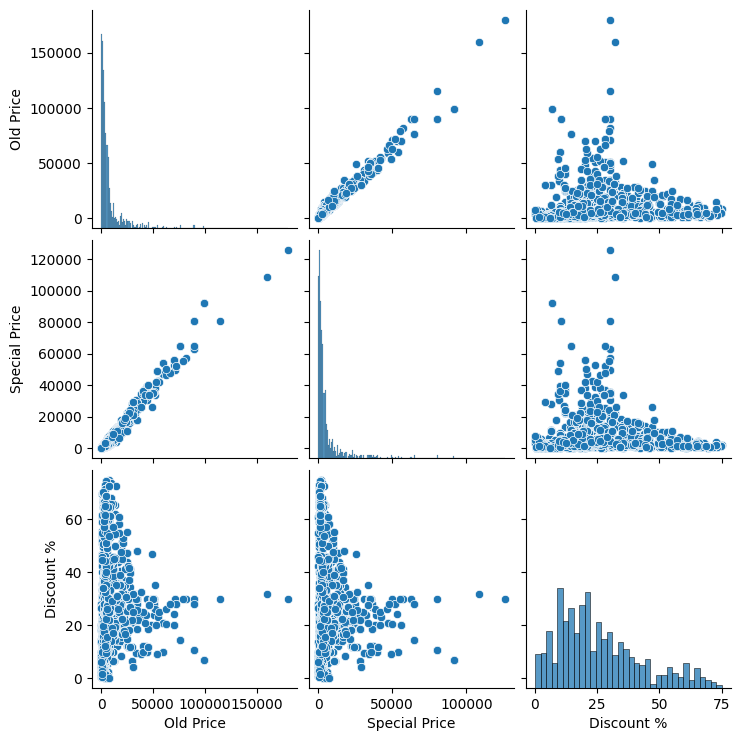

In [17]:
import seaborn as sns

sns.pairplot(df_numeric)


## Análisis del pairplot

El pairplot permite observar simultáneamente la relación entre las variables numéricas del dataset. Se confirma visualmente la relación lineal entre el precio original y el precio con descuento, mientras que el porcentaje de descuento presenta una distribución más dispersa, lo que refuerza la idea de estrategias comerciales diferenciadas.


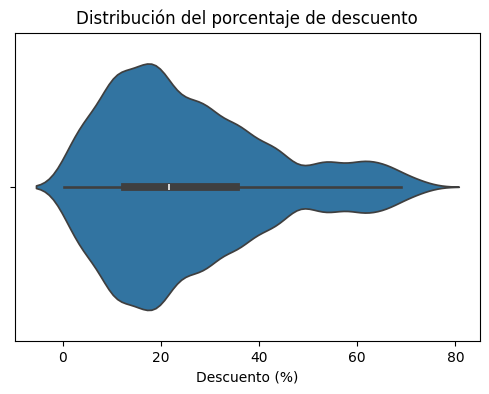

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.violinplot(x=df["Discount %"])
plt.title("Distribución del porcentaje de descuento")
plt.xlabel("Descuento (%)")
plt.show()


## Análisis del violinplot

El violinplot permite observar la densidad de distribución del porcentaje de descuento. Se identifican concentraciones de valores en determinados rangos, lo que sugiere la existencia de políticas de descuento recurrentes, junto con valores extremos asociados a promociones específicas.


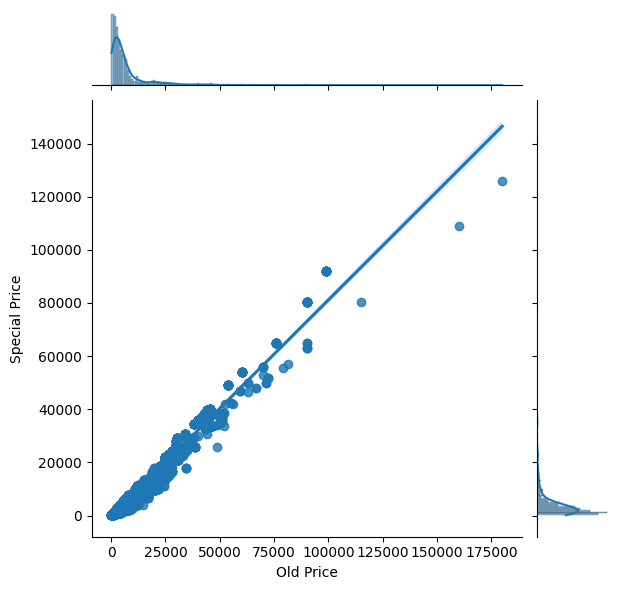

In [24]:
sns.jointplot(
    x="Old Price",
    y="Special Price",
    data=df,
    kind="reg"
)


### Análisis mediante jointplot

El jointplot permite observar simultáneamente la relación entre el precio original y el precio con descuento, junto con sus distribuciones marginales. La presencia de una tendencia lineal refuerza los resultados obtenidos en los análisis de correlación y regresión.


## Insights visuales relevantes

Las visualizaciones avanzadas refuerzan los resultados obtenidos en los análisis previos. En particular, se observa consistencia en la relación entre precios y una aplicación no uniforme de los descuentos, lo que aporta información relevante para la toma de decisiones comerciales orientadas a estrategias de precios y promociones.


# Lección 6: Visualización final y conclusiones


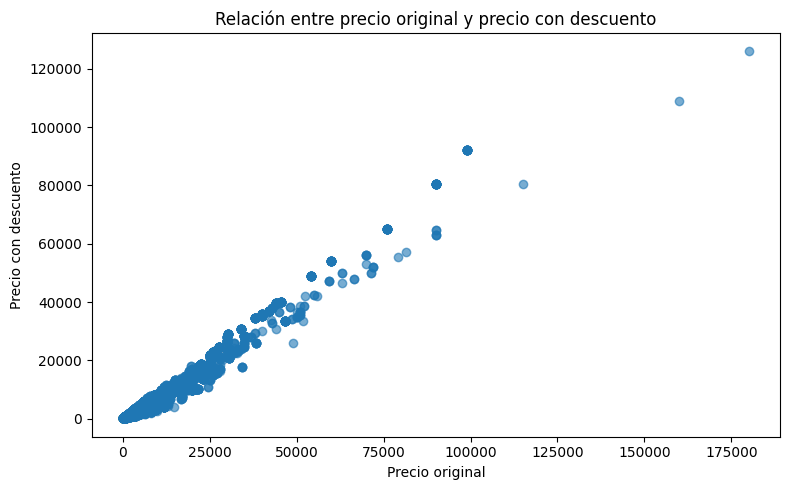

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(df["Old Price"], df["Special Price"], alpha=0.6)
plt.xlabel("Precio original")
plt.ylabel("Precio con descuento")
plt.title("Relación entre precio original y precio con descuento")
plt.tight_layout()
plt.savefig("../figures/relacion_precios.png")
plt.show()


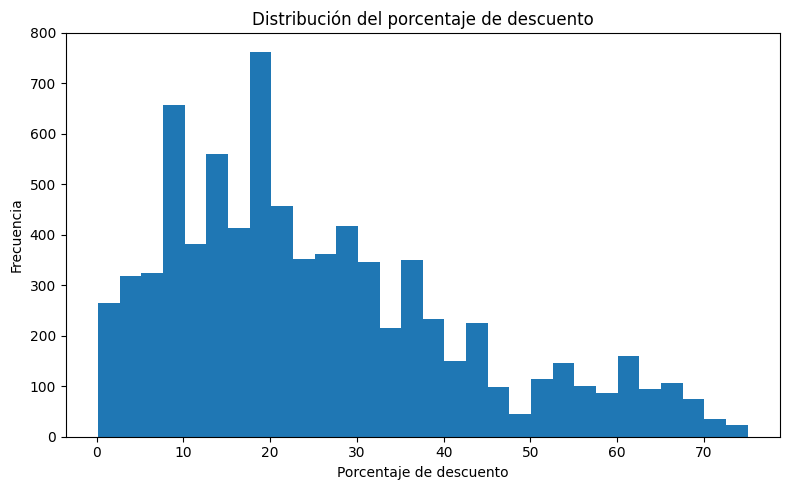

In [20]:
plt.figure(figsize=(8,5))
plt.hist(df["Discount %"], bins=30)
plt.xlabel("Porcentaje de descuento")
plt.ylabel("Frecuencia")
plt.title("Distribución del porcentaje de descuento")
plt.tight_layout()
plt.savefig("../figures/distribucion_descuentos.png")
plt.show()


## Exportación de visualizaciones

Las visualizaciones finales fueron exportadas correctamente en formato PNG y almacenadas en la carpeta `figures/`, permitiendo su posterior uso en el informe técnico y en la presentación del proyecto.


## Conclusión ejecutiva

El análisis exploratorio de datos realizado permitió comprender el comportamiento de los precios y descuentos en el comercio electrónico analizado. A través de técnicas estadísticas, visualizaciones y modelos de regresión, se obtuvieron insights relevantes que pueden apoyar la toma de decisiones comerciales, especialmente en la definición de estrategias de precios y promociones. El proyecto demuestra la utilidad del análisis de datos como herramienta de apoyo a la gestión empresarial.


## Conclusiones finales

El análisis exploratorio de datos realizado sobre el dataset de productos de comercio electrónico permitió identificar patrones relevantes en la estructura de precios y en la aplicación de descuentos. Se evidenció una relación consistente entre el precio original y el precio con descuento, confirmada mediante análisis visual, correlacional y de regresión lineal.

Asimismo, el porcentaje de descuento mostró una distribución variable, lo que sugiere la implementación de estrategias comerciales diferenciadas según el tipo o valor del producto. En conjunto, los resultados obtenidos aportan información valiosa para la toma de decisiones comerciales orientadas a la optimización de precios y promociones en el contexto del comercio electrónico analizado.


## Cierre del proyecto

El presente proyecto permitió aplicar de forma práctica las técnicas de análisis exploratorio de datos abordadas en el módulo, integrando análisis estadístico, visualización de datos y modelamiento básico. El desarrollo se realizó utilizando Python y herramientas estándar de ciencia de datos, asegurando un enfoque reproducible y alineado con buenas prácticas profesionales.
